In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy import desc

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)
first_row=session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2063d0f95f8>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [23]:
inspector=inspect(engine)
measure_columns = inspector.get_columns('Measurement')
for column in measure_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
engine.execute('SELECT date FROM Measurement ORDER BY date DESC LIMIT 10').fetchall()

[('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',)]

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# '2017-08-23'
last_12_mo=engine.execute("SELECT prcp,date FROM Measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23'").fetchall()

In [12]:
last_year_df= pd.DataFrame(last_12_mo, columns=['Precipitation', 'Date'])
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df.set_index('Date',inplace=True)
# Sort the dataframe by date
last_year_df.sort_index()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


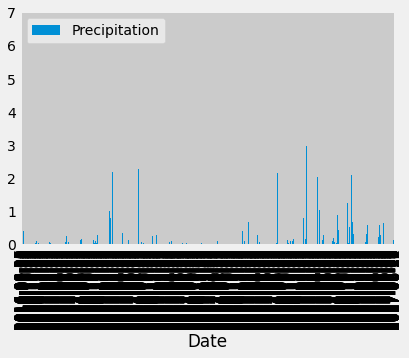

In [13]:


# Use Pandas Plotting with Matplotlib to plot the data
last_year_df.plot.bar()
plt.show()



In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number stations in the dataset
station_columns = inspector.get_columns('Station')
for column in station_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
first_station=session.query(Station).first()
first_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2063fd06748>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'station': 'USC00519397',
 'elevation': 3.0,
 'latitude': 21.2716}

In [17]:
station_data=engine.execute('SELECT * FROM Station').fetchall()


In [18]:
station_df= pd.DataFrame(station_data, columns=['ID','Station','Name','Latitude','Longitude','Elevation'])

station_df.count()

ID           9
Station      9
Name         9
Latitude     9
Longitude    9
Elevation    9
dtype: int64

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
measures_data=engine.execute('SELECT station FROM Measurement').fetchall()
measures_df= pd.DataFrame(measures_data, columns=['Station'])
# List the stations and the counts in descending order.
measures_df['Station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: Station, dtype: int64

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# USC00519281
# busy_stat_df=Measure['']
temp_desc_data=engine.execute("SELECT tobs FROM Measurement WHERE station ='USC00519281'").fetchall()
# temp_max=temp_desc_df.max()
# temp_min=temp_desc_df.min()
# temp_av=temp_desc_df.mean()
last_year_df= pd.DataFrame(temp_desc_data, columns=['Temps'])
last_year_df.describe()


,Temps
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps_last_year=engine.execute("SELECT date,tobs FROM Measurement WHERE station ='USC00519281'")

# =engine.execute("SELECT * FROM Measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23'

temps_df= pd.DataFrame(temps_last_year, columns=['Date', 'Temps'])
temps_df['Date'] = pd.to_datetime(temps_df['Date'])  

mask = (temps_df['Date'] > '2016-08-23') & (temps_df['Date'] <= '2017-08-23')
histogram=temps_df.loc[mask]
x_dates=histogram["Date"]
y_temps=histogram["Temps"]
temps_df=temps_df.set_index('Date')
temps_df
histogram=histogram.set_index('Date')
histogram

,Temps
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


In [35]:
dates=[]
temps=[]

for x,y in histogram:
    dates.append(row[0])
    temps.append(row[1])


ValueError: too many values to unpack (expected 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020643D09B00>]],
      dtype=object)

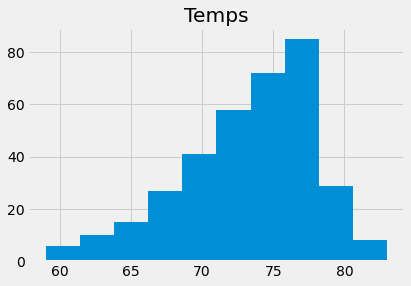

In [36]:
histogram.hist()

# Close session

In [26]:
# Close Session
session.close()